In [4]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [6]:
# Read the csv file
df = pd.read_csv('data/GE.csv')
#print(df.head())  # 7 columns, including the Date.
print(df)  # 7 columns, including the Date.


           Date        Open        High         Low       Close   Adj Close  \
0    2021-04-12  108.879997  109.440002  107.760002  108.720001  108.360611   
1    2021-04-13  108.080002  108.320000  106.080002  107.519997  107.164574   
2    2021-04-14  107.440002  110.320000  107.360001  109.440002  109.078232   
3    2021-04-15  109.839996  110.000000  107.519997  108.400002  108.041679   
4    2021-04-16  109.040001  109.440002  106.800003  107.120003  106.765900   
..          ...         ...         ...         ...         ...         ...   
249  2022-04-05   91.660004   92.339996   89.910004   90.099998   90.099998   
250  2022-04-06   89.370003   90.169998   87.820000   89.910004   89.910004   
251  2022-04-07   89.820000   90.080002   87.089996   89.459999   89.459999   
252  2022-04-08   89.489998   90.269997   88.620003   89.739998   89.739998   
253  2022-04-11   89.540001   91.584999   89.270798   90.059998   90.059998   

      Volume  
0    5259625  
1    6402975  
2    8

In [7]:
# Separate dates for future plotting
train_dates = pd.to_datetime(df['Date'])
print(train_dates.tail(15))  # Check last few dates.

# Variables for training
cols = list(df)[1:6]
# Date and volume columns are not used in training.
print(cols)  # ['Open', 'High', 'Low', 'Close', 'Adj Close']

# New dataframe with only training data - 5 columns
df_for_training = df[cols].astype(float)

239   2022-03-22
240   2022-03-23
241   2022-03-24
242   2022-03-25
243   2022-03-28
244   2022-03-29
245   2022-03-30
246   2022-03-31
247   2022-04-01
248   2022-04-04
249   2022-04-05
250   2022-04-06
251   2022-04-07
252   2022-04-08
253   2022-04-11
Name: Date, dtype: datetime64[ns]
['Open', 'High', 'Low', 'Close', 'Adj Close']


<AxesSubplot:>

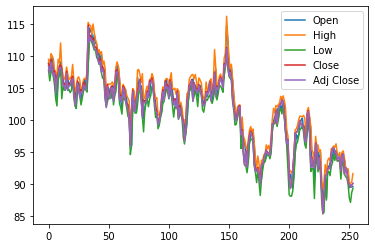

In [8]:
df_for_plot=df_for_training.tail(5000)
df_for_plot.plot.line()